# Complete Guide to Descriptive Stats

Welcome to this comprehensive guide on descriptive statistics, designed to equip you with the knowledge and skills to summarize and explore data effectively. Whether you're a budding data scientist or a seasoned professional looking to refine your data analysis skills, this notebook is tailored for you!

## What Will You Learn?

In this guide, we will explore various methods to describe and analyze data, ensuring you have the tools to confidently tackle any data-driven challenge. Here's what we'll cover:

- **Introduction**: Learn about data types, terminologies, and foundational concepts in descriptive statistics.
- **Use Frequency Table and Mode for Categorical Variables**: Learn how to generate frequency tables and calculate the mode for categorical data.
- **Use Basic and Advanced Statistics for Numerical Variables**: Understand and calculate basic statistics like mean, median, and standard deviation, as well as advanced statistics such as skewness, kurtosis, confidence intervals for means, range, interquartile range.
- **Create Cross-Tabulation for Categorical Variables**: Explore the relationships between categorical variables through cross-tabulation.
- **Create Pivot Table for Categorical and Numerical Variables**: Master the use of pivot tables to summarize data involving both categorical and numerical variables.

## Why This Guide?

- **Step-by-Step Tutorials**: Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning**: Engage with interactive code cells that allow you to see the effects of descriptive statistics in real-time.
- **Enhanced Visualization and Analysis**: Discover advanced techniques and tools for data visualization and statistical testing.

### How to Use This Notebook

- **Run the Cells**: Follow along with the code examples by running the cells yourself. Modify the parameters to see how the results change.
- **Explore Further**: After completing the guided sections, try applying the methods to your own datasets to reinforce your learning.

Let's dive in and transform data into insights!


# Introduction: foundational concepts
## Rectangular Data

The fundamental data structure in data science is a rectangular matrix, like a spreadsheet or database table, where rows represent records and columns represent features (variables).

### Key Terms for Rectangular Data
- **Data Frame**: A two-dimensional matrix.
- **Feature**: A column in a data frame (synonyms: attribute, input, predictor, variable).
- **Outcome**: The variable to be predicted (synonyms: dependent variable, response, target, output).
- **Record**: A row in a data frame (synonyms: case, example, instance, observation, pattern, sample).

## Types of Structured Data

1. **Numeric Data**:
    - **Continuous**: Data that can take any value within an interval (e.g., wind speed).
    - **Discrete**: Data that can only take integer values (e.g., event counts).


2. **Categorical Data**:
    - **Nominal**: Data that represents categories without a specific order (e.g., types of TV screens, state names).
    - **Binary**: A special case of nominal data with just two categories (e.g., 0/1, true/false).
    - **Ordinal**: Categorical data with an intrinsic order (e.g., numerical ratings like 1, 2, 3, 4, or 5).


### Importance of Data Types

Understanding data types is crucial for selecting the appropriate methods for visualization, analysis, and modeling. Different data types require different statistical treatments and influence how software handles computations.


## Terminology Differences

Understanding the terminology used for rectangular data can be challenging, as it varies across disciplines. Statisticians and data scientists often use different terms to refer to the same concepts. 

- **Statisticians**: 
  - Use the term **predictor variables** to describe the inputs used in a model to forecast a **response** or **dependent variable**.
  - Consider a **sample** to mean a collection of multiple rows of data.
  - A **graph** is a broader term used to describe various types of plots and visualizations. These are not limited to showing connections but can include any visual depiction of data, such as histograms, scatter plots, and line charts. In this context, the term graph applies only to the visualization itself, not the data structure it represents.
  
  
- **Data Scientists**: 
  - Refer to these inputs as **features**, which are used to predict a **target**.
  - Use the term **sample** to refer to a single row of data.
  - A **graph** typically refers to a visual representation of connections between entities, often reflecting the underlying data structure of relationships.

# Loading and Exploring the Dataset

In this section, we will load the dataset and perform an initial exploration to understand its structure and contents. This step is crucial for any data analysis task as it helps in identifying the types of variables, their distributions, and any potential issues such as missing values.

The dataset we are using is `Sales_without_NaNs_v1.3.csv`. Let's start by loading the dataset and displaying the first few rows to get an overview.


In [19]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('datasets/Sales_without_NaNs_v1.3.csv')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nBasic information about the dataset:")
df.info()

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(df.describe())

display(df.describe(include='O'))

First few rows of the dataset:


,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685623,270.167701,83.974852,87.738591,Yes



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         10000 non-null  object 
 1   Customer_Segment              10000 non-null  object 
 2   Sales_Before                  10000 non-null  float64
 3   Sales_After                   10000 non-null  float64
 4   Customer_Satisfaction_Before  10000 non-null  float64
 5   Customer_Satisfaction_After   10000 non-null  float64
 6   Purchase_Made                 10000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB

Summary statistics for numerical columns:


,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,203.846220,280.378330,70.249026,73.921449
std,55.431215,85.463933,16.927639,18.185050
min,24.852966,32.414352,22.202441,18.224938
25%,166.610755,221.438134,56.348229,59.866027
50%,203.347924,273.599150,69.644307,73.708858
75%,239.220116,332.376500,83.318174,90.403099
max,545.422547,818.219997,100.000000,100.000000


,Group,Customer_Segment,Purchase_Made
count,10000,10000,10000
unique,2,3,2
top,Control,Medium Value,Yes
freq,5013,3355,5076


In [12]:
# Calculate percentages for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
continuous_cols = df.select_dtypes(include=['float64']).columns
category_percentages = {}

for col in categorical_cols:
    category_percentages[col] = df[col].value_counts(normalize=True) * 100

for col, percentages in category_percentages.items():
    print(f"Percentages for {col}:")
    for category, percent in percentages.items():
        print(f"  {category}: {percent:.2f}%")
    print("\n")


Percentages for Group:
  Control: 50.13%
  Treatment: 49.87%


Percentages for Customer_Segment:
  Medium Value: 33.55%
  Low Value: 33.54%
  High Value: 32.91%


Percentages for Purchase_Made:
  Yes: 50.76%
  No: 49.24%




# Dataset Description Based on First Step:

Below is a detailed description of each column in the dataset:

1. **Group**
   - **Type**: Categorical
   - **Description**: Indicates the group to which the data entry belongs.
   - **Categories and Percentages**:
     - Control: 50.13%
     - Treatment: 49.87%


2. **Customer_Segment**
   - **Type**: Categorical
   - **Description**: Represents the segment of customers.
   - **Categories and Percentages**:
     - Medium Value: 33.55%
     - Low Value: 33.54%
     - High Value: 32.91%


3. **Sales_Before**
   - **Type**: Numerical (float)
   - **Description**: The amount of sales recorded before a certain event or time period. This column measures the sales performance before any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 203.85
     - **Standard Deviation**: 55.43
     - **Minimum**: 24.85
     - **25th Percentile**: 166.61
     - **Median**: 203.35
     - **75th Percentile**: 239.22
     - **Maximum**: 545.42


4. **Sales_After**
   - **Type**: Numerical (float)
   - **Description**: The amount of sales recorded after a certain event or time period. This column measures the sales performance after any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 280.38
     - **Standard Deviation**: 85.46
     - **Minimum**: 32.41
     - **25th Percentile**: 221.44
     - **Median**: 273.60
     - **75th Percentile**: 332.38
     - **Maximum**: 818.22


5. **Customer_Satisfaction_Before**
   - **Type**: Numerical (float)
   - **Description**: The level of customer satisfaction before a certain event or time period, measured on a scale (e.g., 0-100). This column captures customer sentiments before any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 70.25
     - **Standard Deviation**: 16.93
     - **Minimum**: 22.20
     - **25th Percentile**: 56.35
     - **Median**: 69.64
     - **75th Percentile**: 83.32
     - **Maximum**: 100.00


6. **Customer_Satisfaction_After**
   - **Type**: Numerical (float)
   - **Description**: The level of customer satisfaction after a certain event or time period, measured on a scale (e.g., 0-100). This column captures customer sentiments after any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 73.92
     - **Standard Deviation**: 18.19
     - **Minimum**: 18.22
     - **25th Percentile**: 59.87
     - **Median**: 73.71
     - **75th Percentile**: 90.40
     - **Maximum**: 100.00


7. **Purchase_Made**
   - **Type**: Categorical
   - **Description**: Indicates whether a purchase was made. This could be a binary variable (e.g., Yes/No) indicating the occurrence of a purchase.
   - **Categories and Percentages**:
     - Yes: 50.76%
     - No: 49.24%



**We want to know more! Let's continue.**

# Metrics for Categorical Features 
Understanding the distribution of categorical variables is crucial in data analysis. In this section, we'll explore how to generate frequency tables and calculate the mode for categorical data.

## Frequency Tables
A frequency table provides a summary of the distribution of categorical variables. It shows the count (frequency) and the percentage of each category in the dataset. This helps in identifying the most common and least common categories.

## Mode
The mode is the value that appears most frequently in a dataset. For categorical data, the mode represents the most common category.


In [25]:
# Iterate over each categorical column to generate frequency tables and calculate the mode
for col in categorical_cols:
    # Print the header for the frequency table
    print(f"Frequency Table for {col}:")

    # Create a frequency table
    frequency_table = df[col].value_counts().reset_index()
    # Rename the columns for better readability
    frequency_table.columns = [col, 'Frequency']

    # Set the category names as the index
    frequency_table.set_index(col, inplace=True)

    # Calculate the percentage for each category
    frequency_table['Percentage'] = (frequency_table['Frequency'] / len(df)) * 100

    # Print the frequency table
    print(frequency_table)
    print("\n")

    # Calculate the mode of the column
    mode_value = df[col].mode()

    # Print the mode of the column
    print(f"Mode for {col}: {mode_value}\n")


Frequency Table for Group:
           Frequency  Percentage
Group                           
Control         5013       50.13
Treatment       4987       49.87


Mode for Group: 0    Control
Name: Group, dtype: object

Frequency Table for Customer_Segment:
                  Frequency  Percentage
Customer_Segment                       
Medium Value           3355       33.55
Low Value              3354       33.54
High Value             3291       32.91


Mode for Customer_Segment: 0    Medium Value
Name: Customer_Segment, dtype: object

Frequency Table for Purchase_Made:
               Frequency  Percentage
Purchase_Made                       
Yes                 5076       50.76
No                  4924       49.24


Mode for Purchase_Made: 0    Yes
Name: Purchase_Made, dtype: object



## Key Findings

### Group
- **Frequency Distribution**:
  - Control: 5013 (50.13%)
  - Treatment: 4987 (49.87%)
- **Mode**: Control

**Analysis**:
- The dataset is almost evenly split between the Control and Treatment groups, with a slight majority in the Control group. This balance is crucial for comparative analysis between the two groups.

### Customer_Segment
- **Frequency Distribution**:
  - Medium Value: 3355 (33.55%)
  - Low Value: 3354 (33.54%)
  - High Value: 3291 (32.91%)
- **Mode**: Medium Value

**Analysis**:
- The customer segments are almost evenly distributed among Medium Value, Low Value, and High Value. The Medium Value segment is the most common, but the difference in frequencies among the segments is minimal, indicating a well-balanced segmentation.

### Purchase_Made
- **Frequency Distribution**:
  - Yes: 5076 (50.76%)
  - No: 4924 (49.24%)
- **Mode**: Yes

**Analysis**:
- The dataset shows a nearly even split between customers who made a purchase and those who did not, with a slight majority having made a purchase. This indicates a balanced dataset in terms of purchase behavior.



# Metrics for Numerical Features Based on Robustness to Outliers

Understanding how different metrics handle outliers is crucial in data analysis. Below are key metrics for numerical features categorized by their robustness to outliers.

## Outliers
Outliers are data points that differ significantly from other observations in the dataset. They can be the result of variability in the data or indicate measurement error. Identifying and handling outliers is essential because they can heavily influence statistical analyses.

## Robust to Outliers

These metrics are less influenced by extreme values, making them reliable for datasets with anomalies:

- **Median**: The middle value when the data is sorted. It is not affected by extreme values and is a good measure of central tendency for skewed distributions.
  - **Formula**: For a dataset sorted in ascending order \( x_1, x_2, ..., x_n \):
  
    $$
    \text{Median} = 
    \begin{cases} 
    x_{\frac{n+1}{2}} & \text{if } n \text{ is odd} \\
    \frac{x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}}{2} & \text{if } n \text{ is even}
    \end{cases}
    $$
    

- **Trimmed Mean**: The mean calculated after removing a fixed percentage of the smallest and largest values, reducing the impact of outliers.
  - **Formula**: For a dataset \( x_1, x_2, ..., x_n \) with the smallest \( p \) and largest \( p \) values removed:
  
    $$
    \text{Trimmed Mean} = \frac{1}{n - 2p} \sum_{i = p+1}^{n-p} x_i
    $$


- **Median Absolute Deviation (MAD)**: The median of the absolute deviations from the median. It provides a robust measure of variability.
  - **Formula**: For a dataset \( x_1, x_2, ..., x_n \) with median \( m \):
  
    $$
    \text{MAD} = \text{Median}(|x_1 - m|, |x_2 - m|, ..., |x_n - m|)
    $$


- **Interquartile Range (IQR)**: The range between the 75th and 25th percentiles. It measures the spread of the middle 50% of the data, excluding outliers.
  - **Formula**: For a dataset with the 75th percentile $( Q3 $) and the 25th percentile $( Q1 $):
  
    $$
    \text{IQR} = Q3 - Q1
    $$


## Sensitive to Outliers

These metrics can be significantly affected by extreme values, making them more suitable for datasets without anomalies:

- **Mean**: The average value of the dataset, calculated as the sum of all values divided by the number of values. It is sensitive to outliers.

  - **Formula**: For a dataset \( x_1, x_2, ..., x_n \):
    $$
    \text{Mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
    $$

- **Standard Deviation**: A measure of the amount of variation or dispersion in the dataset. It is also affected by outliers.
  - **Formula**: For a dataset \( x_1, x_2, ..., x_n \) with mean $( \mu $):
  
    $$
    \text{Standard Deviation} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2}
    $$

- **Variance**: The average of the squared deviations from the mean. It is sensitive to outliers and provides a measure of variability.

  - **Formula**: For a dataset \( x_1, x_2, ..., x_n \) with mean $( \mu $):
    $$
    \text{Variance} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2
    $$

### Additional Metrics

- **Weighted Mean**: An average where each value is multiplied by a weight, reflecting its importance or frequency. It is sensitive to outliers.

  - **Formula**: For a dataset \( x_1, x_2, ..., x_n \) with weights \( w_1, w_2, ..., w_n \):
    $$
    \text{Weighted Mean} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}
    $$

- **Percentiles**: Values that divide the data into 100 equal parts. Percentiles are useful for understanding the distribution but can be computationally expensive for large datasets.
  - **Formula**: For a dataset sorted in ascending order, the \( P \)th percentile is the value below which \( P \)% of the data falls.

By selecting the appropriate metrics based on their robustness to outliers, you can gain a more accurate and reliable understanding of your data's distribution and variability.


## Why Median or Mean Alone is Not Sufficient

While the median is a robust measure of central tendency and is not influenced by outliers, it does have limitations. The median provides a single point estimate of the center of the data but does not offer information about the distribution's shape or spread. Here are some key points to consider:

- **Lack of Sensitivity to Distribution**: The median does not change with the addition or removal of extreme values unless they cross the median point. It does not capture the distribution's overall variability.
- **No Information on Dispersion**: The median does not provide any insight into how spread out the data is. Measures of variability are needed to understand the data's dispersion.

## Differences Between Metrics

### Measures of Central Tendency
- **Mean**: Sensitive to all data points, including outliers. Provides a comprehensive measure but can be misleading with skewed distributions.
- **Median**: Robust to outliers and skewness. Represents the middle value but lacks information on the distribution's spread.
- **Trimmed Mean**: Provides a balance by excluding extreme values, offering a measure that is less influenced by outliers than the mean but more sensitive than the median.

### Measures of Variability
- **Standard Deviation**: Measures the average dispersion of data points from the mean. Sensitive to outliers.
- **Variance**: The square of the standard deviation. It gives more weight to extreme values due to squaring.
- **Median Absolute Deviation (MAD)**: Measures the dispersion using the median, making it robust to outliers.
- **Interquartile Range (IQR)**: Measures the spread of the middle 50% of the data, excluding outliers.

## Recommended Combinations

To get a comprehensive understanding of your data, it's essential to use both central tendency and variability measures together:

### For Robust Analysis (with outliers):
- **Central Tendency**: Median or Trimmed Mean
- **Variability**: Median Absolute Deviation (MAD) or Interquartile Range (IQR)

### For Standard Analysis (without significant outliers):
- **Central Tendency**: Mean
- **Variability**: Standard Deviation


In [26]:
from scipy import stats
import pandas as pd

# Function to calculate metrics for skewed and normal distributions
def calculate_metrics(column_data, trim_ratio=0.1):
    # metrics
    mean_value = column_data.mean()
    median_value = column_data.median()
    std_dev_value = column_data.std()
    variance_value = column_data.var()
    confidence_interval = stats.norm.interval(0.95, loc=mean_value, scale=stats.sem(column_data))
    trimmed_mean_value = stats.trim_mean(column_data, proportiontocut=trim_ratio)
    skewness_value = column_data.skew()
    kurtosis_value = column_data.kurtosis()
    mad_value = stats.median_abs_deviation(column_data)
    iqr_value = stats.iqr(column_data)

    return {
        "Mean": mean_value,
        "Trimmed Mean": trimmed_mean_value,
        "Median": median_value,
        "Standard Deviation": std_dev_value,
        "Variance": variance_value,
        "95% Confidence Interval": confidence_interval,
        "Skewness": skewness_value,
        "Kurtosis": kurtosis_value,
        "MAD": mad_value,
        "IQR": iqr_value
    }

# Iterate over each continuous column to calculate and print statistics
for col in continuous_cols:
    col_data = df[col]
    metrics = calculate_metrics(col_data)
    
    # Print the statistics with explanations
    print(f"\nStatistics for {col}:")
    print(f"{'Metric':<35} {'Value':<40} {'Explanation':<80}")
    print(f"{'-'*35} {'-'*40} {'-'*80}")
    print(f"{'Mean':<35} {metrics['Mean']:<40} {'Important for normal distributions; sensitive to outliers'}")
    print(f"{'Trimmed Mean':<35} {metrics['Trimmed Mean']:<40} {'Less sensitive to outliers; robust measure of central tendency'}")
    print(f"{'Median':<35} {metrics['Median']:<40} {'Important for skewed distributions; robust to outliers'}")
    print(f"{'Standard Deviation':<35} {metrics['Standard Deviation']:<40} {'Measures dispersion; sensitive to outliers'}")
    print(f"{'Variance':<35} {metrics['Variance']:<40} {'Measures dispersion; sensitive to outliers'}")
    print(f"{'95% Confidence Interval':<35} {str(metrics['95% Confidence Interval']):<40} {'Estimate of the mean with 95% confidence; assumes normal distribution'}")
    print(f"{'Skewness':<35} {metrics['Skewness']:<40} {'Indicates asymmetry of the distribution; high absolute values suggest skewness'}")
    print(f"{'Kurtosis':<35} {metrics['Kurtosis']:<40} {'Measures tailedness of the distribution; high values indicate heavy tails'}")
    print(f"{'MAD':<35} {metrics['MAD']:<40} {'Median Absolute Deviation; robust measure of variability for skewed distributions'}")
    print(f"{'IQR':<35} {metrics['IQR']:<40} {'Interquartile Range; measures the spread of the middle 50% of the data, robust to outliers'}\n")



Statistics for Sales_Before:
Metric                              Value                                    Explanation                                                                     
----------------------------------- ---------------------------------------- --------------------------------------------------------------------------------
Mean                                203.84622026439422                       Important for normal distributions; sensitive to outliers
Trimmed Mean                        202.9964129584753                        Less sensitive to outliers; robust measure of central tendency
Median                              203.34792402783143                       Important for skewed distributions; robust to outliers
Standard Deviation                  55.43121460422003                        Measures dispersion; sensitive to outliers
Variance                            3072.6195524990962                       Measures dispersion; sensitive to outliers
95% Con

## Key Findings

### Sales_Before
- **Central Tendency**: The mean (203.85) and median (203.35) are close, suggesting a relatively symmetrical distribution. The trimmed mean (203.00) is slightly lower, indicating a few high outliers.
- **Variability**: The standard deviation (55.43) and variance (3072.62) show moderate dispersion. MAD (36.39) and IQR (72.61) also indicate significant variability within the middle 50% of the data.
- **Distribution Shape**: Skewness (0.21) and kurtosis (0.40) suggest slight asymmetry and heavier tails than a normal distribution, indicating the presence of outliers.

### Sales_After
- **Central Tendency**: The mean (280.38) and median (273.60) have increased significantly compared to Sales_Before, indicating improvement. The trimmed mean (277.07) is lower than the mean, highlighting the impact of high outliers.
- **Variability**: Standard deviation (85.46) and variance (7304.08) have increased, showing higher variability post-intervention. MAD (55.18) and IQR (110.94) also reflect greater spread within the middle 50%.
- **Distribution Shape**: Skewness (0.45) indicates a moderate positive skew, and kurtosis (0.52) shows heavier tails, suggesting more frequent high sales values and outliers.

### Customer_Satisfaction_Before
- **Central Tendency**: The mean (70.25) and median (69.64) are close, suggesting symmetry. The trimmed mean (69.96) is slightly lower, indicating minimal impact from outliers.
- **Variability**: Standard deviation (16.93) and variance (286.54) show moderate dispersion. MAD (13.47) and IQR (26.97) indicate consistent variability within the middle 50%.
- **Distribution Shape**: Skewness (0.11) is very low, indicating near symmetry, while kurtosis (-0.91) suggests lighter tails, indicating fewer outliers.

### Customer_Satisfaction_After
- **Central Tendency**: The mean (73.92) and median (73.71) have increased, indicating improved satisfaction. The trimmed mean (74.48) is slightly higher than the mean, suggesting an increase in consistency.
- **Variability**: Standard deviation (18.19) and variance (330.70) show slightly higher dispersion compared to before. MAD (15.04) and IQR (30.54) also reflect increased spread within the middle 50%.
- **Distribution Shape**: Skewness (-0.11) indicates slight negative skew, while kurtosis (-0.95) suggests lighter tails, similar to the pre-intervention state.

## Conclusion
- **Sales Improvement**: The increase in mean and median values for Sales_After suggests a positive impact of the intervention. However, the higher variability and presence of outliers indicate that the improvement is not uniform across all periods/categories.
- **Customer Satisfaction**: The increase in mean and median values for Customer_Satisfaction_After suggests improved satisfaction levels post-intervention. The variability has increased slightly, but the distribution remains relatively consistent.
- **Outliers**: The trimmed mean values for both sales and customer satisfaction highlight the presence of outliers, which impact the mean values. These should be investigated further to understand their causes and address any potential issues.

# Create Cross-Tabulation for Categorical Variables


## pandas.crosstab 

The `pandas.crosstab` function is a powerful tool used in data analysis for generating cross-tabulations of two or more factors. It is useful for creating contingency tables that summarize the relationship between **categorical variables**. By default, it computes a frequency table unless specified otherwise.

## Key Parameters

### index
Values to group by in the rows. This can be an array-like object, Series, or a list of arrays/Series.

### columns
Values to group by in the columns. Similar to the `index` parameter, this can be an array-like object, Series, or a list of arrays/Series.

### values
An optional array of values to aggregate according to the factors specified in the `index` and `columns`. If not specified, the function counts the occurrences of each combination of factors.

### aggfunc
The aggregation function to use if aggregating `values`. This could be functions like `np.sum`, `np.mean`, etc. It determines how the values will be combined within each group.

### margins
A boolean parameter that, when set to `True`, adds row and column margins (subtotals) to the crosstab. This is useful for getting the total counts across rows and columns.

### normalize
This parameter normalizes the data by dividing all values by the sum of values. It can be set to:
- `True` to normalize by the sum of all values.
- `'index'` or `0` to normalize by row totals.
- `'columns'` or `1` to normalize by column totals.


For more detailed information, you can refer to the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).


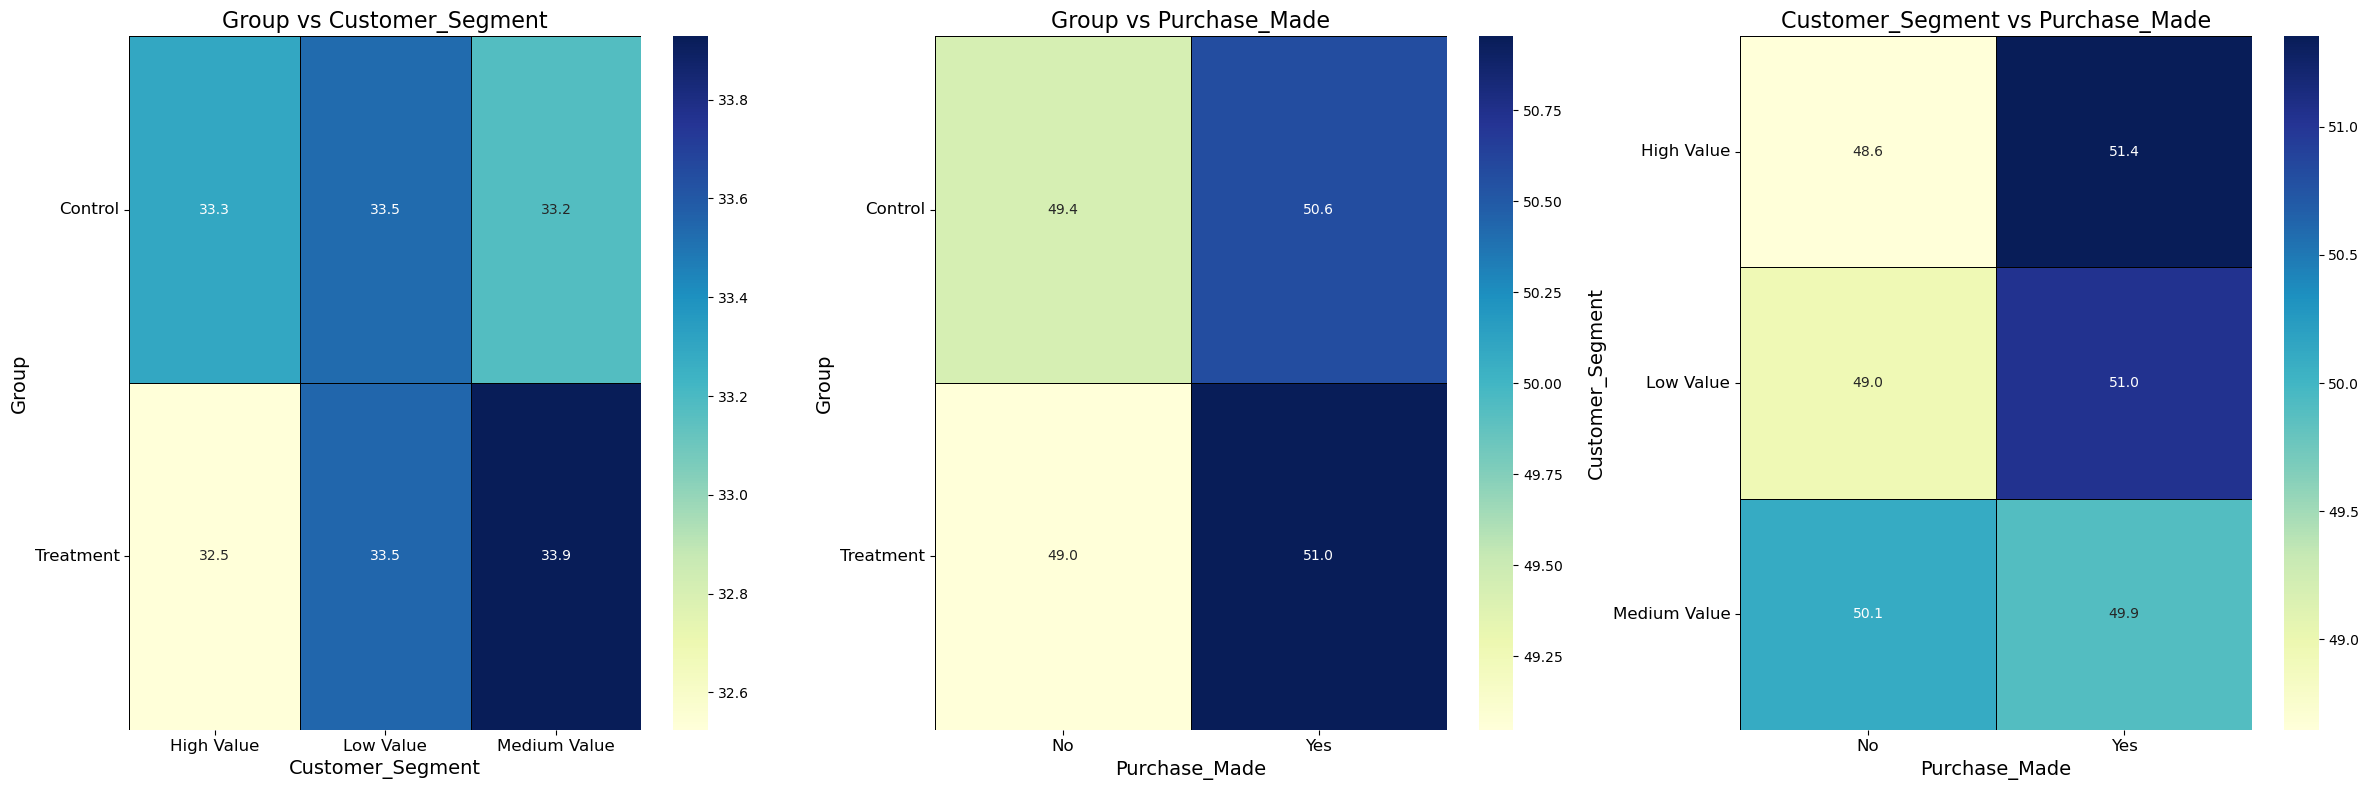

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot heatmap for cross-tabulation
def plot_crosstab_heatmap(df, col1, col2, ax):
    cross_tab = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='black', ax=ax)
    ax.set_title(f"{col1} vs {col2}", fontsize=16)
    ax.set_xlabel(col2, fontsize=14)
    ax.set_ylabel(col1, fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12, rotation=0)

# Plot all heatmaps in a single row
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Generate cross-tabulations and plot heatmaps for each pair of categorical variables
pairs = [(categorical_cols[i], categorical_cols[j]) for i in range(len(categorical_cols)) for j in range(i + 1, len(categorical_cols))]
for idx, (col1, col2) in enumerate(pairs[:3]):
    plot_crosstab_heatmap(df, col1, col2, axes[idx])

plt.tight_layout()
plt.show()


# Create Pivot Table for Categorical and Continuous Variables


## pandas.pivot_table

The `pandas.pivot_table` function is a powerful tool for creating spreadsheet-style pivot tables. It is used to summarize data by grouping and aggregating values based on one or more keys.

## Key Parameters

### data
The DataFrame from which to create the pivot table.

### values
The column(s) to aggregate. If not specified, all remaining numeric columns will be aggregated.

### index
The column(s) to group by. This creates the rows of the pivot table.

### columns
The column(s) to group by. This creates the columns of the pivot table.

### aggfunc
The aggregation function(s) to use for aggregating values. This can be a single function or a list of functions, such as `np.mean`, `np.sum`, `np.count`, etc.

### fill_value
The value to replace missing values (NaN) in the pivot table. Useful for ensuring the table is complete.

### margins
A boolean parameter that, when set to `True`, adds all rows and columns to the pivot table with subtotals.

### dropna
A boolean parameter that, when set to `True`, drops columns with all NaN values.

### margins_name
The name of the row/column that will contain the totals when `margins` is True. Default is 'All'.

### observed
A boolean parameter, when set to `True`, only shows observed values for categorical groupers.

For more detailed information, you can refer to the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).


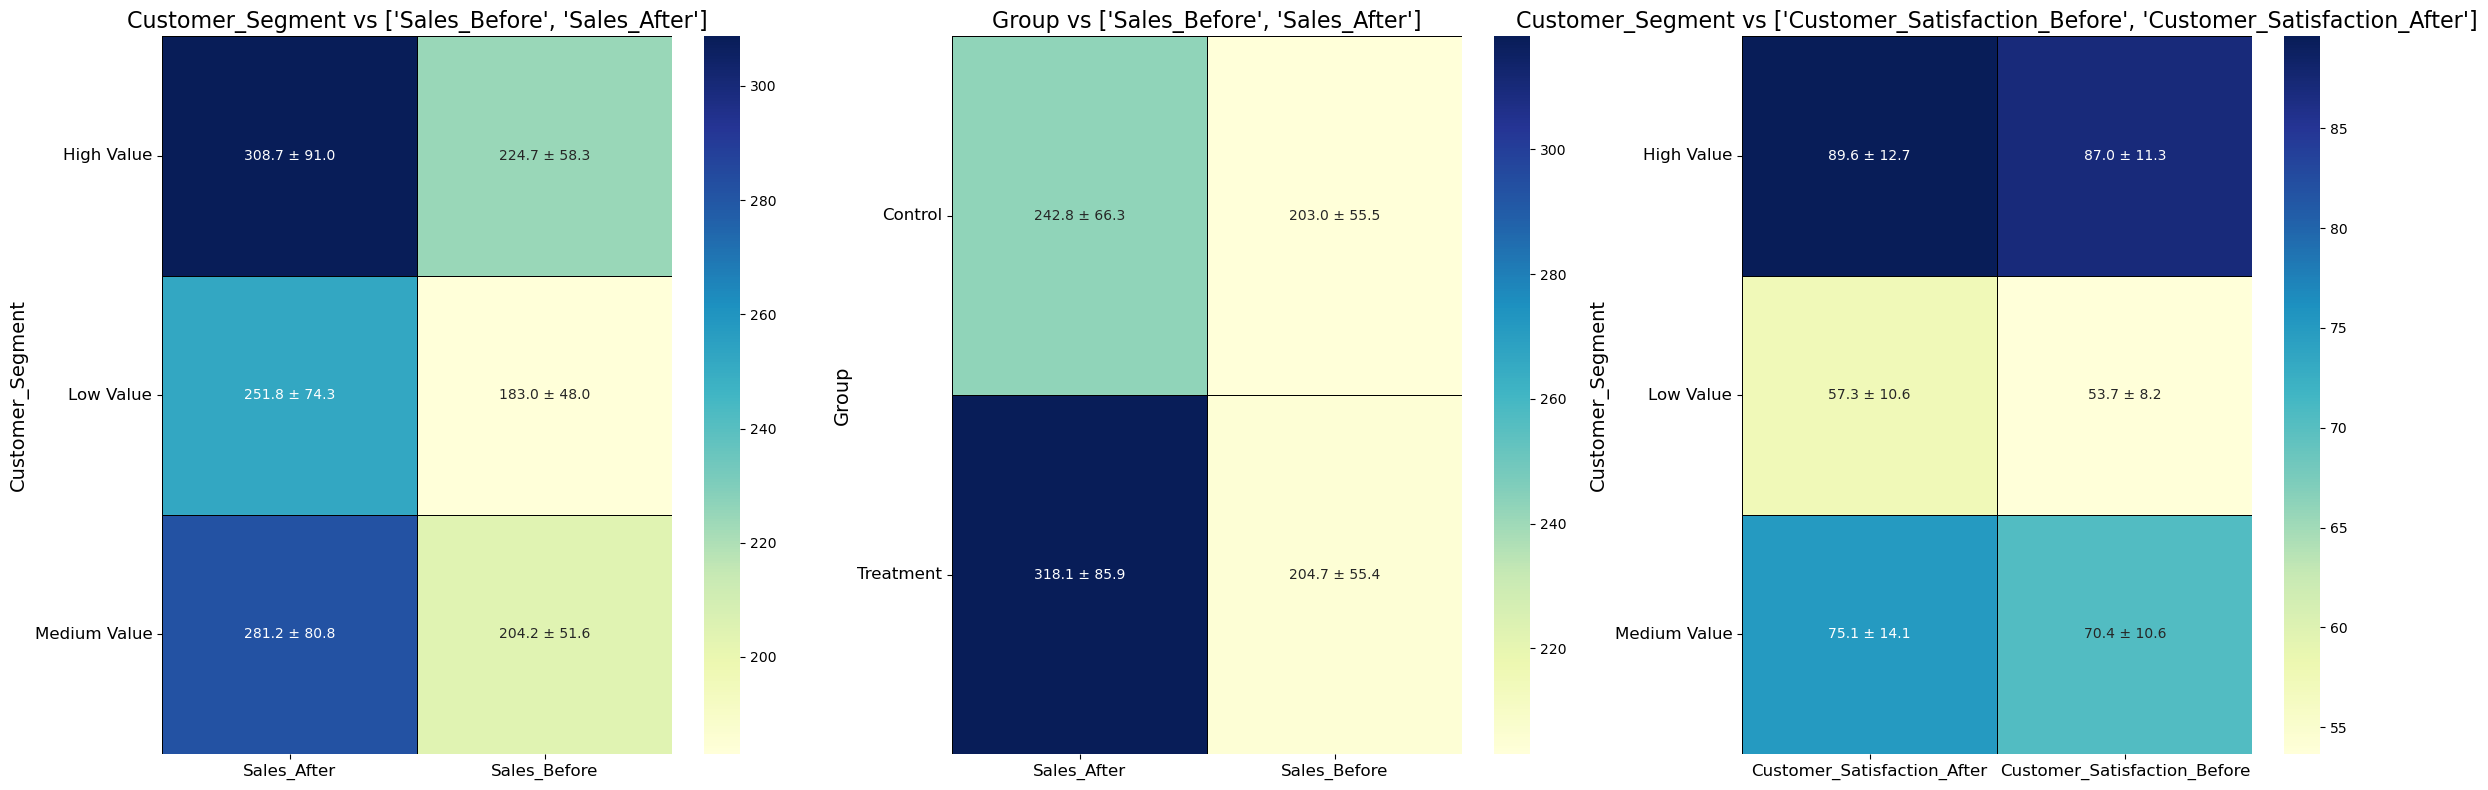

In [42]:
# Function to plot heatmap for pivot table
def plot_pivot_table_heatmap(df, index_col, value_cols, ax):
    mean_pivot = pd.pivot_table(df, values=value_cols, index=index_col, aggfunc='mean')
    std_pivot = pd.pivot_table(df, values=value_cols, index=index_col, aggfunc='std')
    
    # Plot heatmap for mean values
    sns.heatmap(mean_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='black', ax=ax)
    
    # Annotate with mean ± std
    for text in ax.texts:
        value = text.get_text()
        row, col = int(text.get_position()[1]), int(text.get_position()[0])
        text.set_text(f"{mean_pivot.iloc[row, col]:.1f} ± {std_pivot.iloc[row, col]:.1f}")
    
    ax.set_title(f"{index_col} vs {value_cols}", fontsize=16)
    ax.set_ylabel(index_col, fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12, rotation=0)

# Choose complex pairs of categorical and continuous variables
chosen_pairs = [
    ('Customer_Segment', ['Sales_Before', 'Sales_After']),
    ('Group', ['Sales_Before', 'Sales_After']),
    ('Customer_Segment', ['Customer_Satisfaction_Before', 'Customer_Satisfaction_After'])
]

# Plot pivot tables and heatmaps for the chosen pairs
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for idx, (index_col, value_cols) in enumerate(chosen_pairs):
    plot_pivot_table_heatmap(df, index_col, value_cols, axes[idx])

plt.tight_layout()
plt.show()


# Further Analysis Resources

For a more comprehensive analysis of your data, consider exploring the following resources:

## Complete Guide to Data Plotting
This guide covers a wide range of data visualization techniques using various plotting libraries. It provides detailed instructions and examples for creating effective and informative plots, which can help you understand and present your data better.

Link: [Complete Guide to Data Plotting](https://www.kaggle.com/code/matinmahmoudi/complete-guide-to-data-plotting-a-to-z)

## Complete Guide to Statistical Testing
This resource offers an in-depth look at statistical testing methods. It covers different statistical tests, their applications, and how to interpret the results. This guide is essential for validating your hypotheses and making data-driven decisions.

Link: [Complete Guide to Statistical Testing](https://www.kaggle.com/code/matinmahmoudi/complete-guide-to-statistical-testing-a-to-z)

## Complete Guide to Data Profiling
For automated exploratory data analysis, this guide provides comprehensive tools and techniques for data profiling. It helps you quickly understand the structure, distribution, and relationships in your data, facilitating efficient and effective analysis.

Link: [Complete Guide to Data Profiling](https://www.kaggle.com/code/matinmahmoudi/complete-guide-to-data-profiling-a-to-z)


## Recommended Reading: Practical Statistics for Data Scientists, 2nd Edition

For those looking to deepen their understanding of statistics in the context of data science, I highly recommend reading [Practical Statistics for Data Scientists, 2nd Edition](https://www.oreilly.com/library/view/practical-statistics-for/9781492072935/). This book, authored by Peter Bruce, Andrew Bruce, and Peter Gedeck, bridges the gap between statistical theory and practical data science applications. 

<img src="https://learning.oreilly.com/library/cover/9781492072935/250" alt="Practical Statistics for Data Scientists" width="400"/>

### Why You Should Read This Book:
- Learn key statistical methods tailored for data science.
- Understand the importance of exploratory data analysis.
- Gain insights into avoiding common pitfalls and misuse of statistical methods.

